# Краткое описание проекта "Восстановление золота из руды"

Необходимо подготовить прототип модели машинного обучения для компании «IT-Индустриализация», разрабатывающей IT-решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Будем использовать данные с параметрами технологического процесса добычи и очистки руды. 

Эффективность обогащения руды рассчитывается по формуле:

RECOVERY = 100% x C x (F-T) / F x (C-T), где

C — доля золота в концентрате после флотации/очистки,
F — доля золота в сырье/концентрате до флотации/очистки,
T — доля золота в отвальных хвостах после флотации/очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В целях выполнения проекта потребуется:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить несколько моделей: Линейная регрессия, Случайный лес, CatBoostRegressor и сравнить их с константной моделью.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Проверка-корректности-расчета-Recovery" data-toc-modified-id="Проверка-корректности-расчета-Recovery-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка корректности расчета Recovery</a></span></li><li><span><a href="#Анализ-данных,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-данных,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ данных, недоступных в тестовой выборке</a></span></li><li><span><a href="#Корректировка-данных-в-train-выборке" data-toc-modified-id="Корректировка-данных-в-train-выборке-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Корректировка данных в train-выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-золота" data-toc-modified-id="Концентрация-золота-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация золота</a></span></li><li><span><a href="#Концентрация-серебра" data-toc-modified-id="Концентрация-серебра-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Концентрация серебра</a></span></li><li><span><a href="#Концентрация-свинца" data-toc-modified-id="Концентрация-свинца-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Концентрация свинца</a></span></li><li><span><a href="#Сравнение-размеров-гранул-сырья" data-toc-modified-id="Сравнение-размеров-гранул-сырья-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сравнение размеров гранул сырья</a></span></li><li><span><a href="#Анализ-суммарной-концентрации-веществ" data-toc-modified-id="Анализ-суммарной-концентрации-веществ-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ суммарной концентрации веществ</a></span></li></ul></li><li><span><a href="#Создание-моделей" data-toc-modified-id="Создание-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Функции-для-расчетов" data-toc-modified-id="Функции-для-расчетов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функции для расчетов</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-CatBoostRegressor" data-toc-modified-id="Модель-CatBoostRegressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Модель CatBoostRegressor</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

Импортируем необходимые библиотеки, модели и методы:

In [1]:
import pandas as pd
import numpy as np
import random

from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor


from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

Прочитаем данные из трёх файлов и выведем на экран основную информацию:

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


**Вывод.** Данные содержатся в трёх датафреймах:
- полный датафрейм (df_full) состоит из 14149 строк и 87 столбцов,
- обучающий датафрейм (df_train) состоит из 14149 строк и 87 столбцов,
- тестовый датафрейм (df_test) состоит из 5290 строк и 53 столбцов.

Наименование столбцов (отражающее данные, содержащиеся в них) - составное:

**(этап).(тип_параметра).(название_параметра)**

Возможные значения для блока (этап):
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока (тип_параметра):
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

Кроме того, в каждом датафрейме имеется столбец date, характеризующий дату и время, в которые была записана строка с параметрами технологического процесса.

### Обработка пропусков

Некоторые столбцы содержат незначительное количество пропусков. Изучив сопроводительную документацию к технологическому процессу, можно сделать вывод, что данные в строках, записанных в соседние промежутки времени, должны отличаться незначительно. Поэтому допустимо заполнить пропуски в столбцах предыдущим значением в данном столбце. Для этого применим метод fillna(method='ffill') к каждому датафрейму:

In [6]:
df_full = df_full.fillna(method='ffill')

In [7]:
df_train = df_train.fillna(method='ffill')

In [8]:
df_test = df_test.fillna(method='ffill')

In [9]:
df_full.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                               19439 non-null  float64


In [10]:
df_train.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


In [11]:
df_test.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

**Вывод.** Пропуски заполнены, датафреймы готовы к дальнейшему анализу.

### Проверка корректности расчета Recovery

Эффективность обогащения руды рассчитывается по формуле:

RECOVERY = 100% x C x (F-T) / F x (C-T), где

- C — доля золота в концентрате после флотации/очистки, в нашем случае: rougher.output.concentrate_au
- F — доля золота в сырье/концентрате до флотации/очистки, в нашем случае: rougher.input.feed_au
- T — доля золота в отвальных хвостах после флотации/очистки, в нашем случае: rougher.output.tail_au



Для проверки правильности расчета эффективности обогащения руды (rougher.output.recovery) создадим новый столбец 'recovery_calc', в который запишем параметр Recovery, рассчитанный по указанной выше формуле:

In [12]:
df_train['recovery_calc'] = 100*df_train['rougher.output.concentrate_au']*\
(df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])/\
(df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))

In [13]:
df_train['recovery_calc'] # проверка создания столбца

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: recovery_calc, Length: 14149, dtype: float64

Рассчитаем среднюю абсолютную ошибку (МАЕ), сравнив данные в столбцах recovery_calc и rougher.output.recovery

In [14]:
print('Recovery MAE =', mean_absolute_error(df_train['rougher.output.recovery'], df_train['recovery_calc']))

Recovery MAE = 1.1498046842860452e-14


**Вывод.** Значение МАЕ получилось близким к нулю - эффективность была рассчитана верно.

### Анализ данных, недоступных в тестовой выборке

Проанализируем данные, недоступные в тестовой выборке. Для этого преобразуем названия столбцов в train- и test-выборках в множества и отнимем одно множество от другого - в результате получим множество из названий столбцов, которых нет в тестовой выборке:

In [15]:
columns_test_out = set(df_train.columns) - set(df_test.columns)

In [16]:
columns_test_out

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery_calc',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 

**Вывод.** Тестовые данные не содержат данных с параметрами продукта (.output.) на выходе каждого этапа, в том числе не содержат двух целевых признаков, это параметры:
- rougher.output.recovery - эффективность флотации и
- final.output.recovery - общая эффективность обогащения.

Для добавления целевых признаков в тестовую выборку будем использовать значения столбца date в качестве индексов датафреймов:

In [17]:
df_test.index = df_test['date']
df_full.index = df_full['date']

In [18]:
df_test # проверка

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
2017-12-31 20:59:59,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
2017-12-31 21:59:59,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882


Создадим новый столбец в тестовой выборке rougher.output.recovery (целевой признак №1), используя данные полной выборки и отфильровав нужные строки по датам-индексам тестовой выборки:

In [19]:
df_test['rougher.output.recovery'] = df_full['rougher.output.recovery'][df_test.index]

In [20]:
df_test['rougher.output.recovery'] # проверка

date
2016-09-01 00:59:59    89.993421
2016-09-01 01:59:59    88.089657
2016-09-01 02:59:59    88.412756
2016-09-01 03:59:59    87.360133
2016-09-01 04:59:59    83.236367
                         ...    
2017-12-31 19:59:59    95.172585
2017-12-31 20:59:59    94.575036
2017-12-31 21:59:59    93.018138
2017-12-31 22:59:59    92.599042
2017-12-31 23:59:59    91.177695
Name: rougher.output.recovery, Length: 5290, dtype: float64

Создадим новый столбец в тестовой выборке final.output.recovery (целевой признак №2), используя данные полной выборки и отфильровав нужные строки по датам-индексам тестовой выборки:

In [21]:
df_test['final.output.recovery'] = df_full['final.output.recovery'][df_test.index]

In [22]:
df_test['final.output.recovery'] # проверка

date
2016-09-01 00:59:59    70.273583
2016-09-01 01:59:59    68.910432
2016-09-01 02:59:59    68.143213
2016-09-01 03:59:59    67.776393
2016-09-01 04:59:59    61.467078
                         ...    
2017-12-31 19:59:59    68.919891
2017-12-31 20:59:59    68.440582
2017-12-31 21:59:59    67.092759
2017-12-31 22:59:59    68.061186
2017-12-31 23:59:59    71.699976
Name: final.output.recovery, Length: 5290, dtype: float64

### Корректировка данных в train-выборке

Судя по заданию, полученному от заказчика, на вход модели будут всегда подаваться данные, соответствующие признакам в тестовой выборке. Поэтому для корректного обучения моделей необходимо в обучающей выборке оставить тоже только те признаки, которые есть в тестовой. 

Создадим в соответствии с указанным принципом датафрейм data_train, который будет использоваться для дальнейшего обучения моделей:

In [23]:
data_train = df_train[df_test.columns]

In [24]:
data_train.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   primary_cleaner.input.sulfate               14149 non-null  float64
 2   primary_cleaner.input.depressant            14149 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14149 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14149 non-null  float64
 10  primary_cl

**Вывод по разделу №1.** В обучающей и тестовой выборках теперь все признаки совпадают, пропусков нет.

## Анализ данных

Проанализируем, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Дополнительно с помощью метода  value_counts() рассмотрим часто встречающиеся значения параметров:

### Концентрация золота

In [25]:
print('Среднее содержание Au в сырье:', df_full['rougher.input.feed_au'].mean())
print('Среднее содержание Au на этапе флотации:', df_full['rougher.output.concentrate_au'].mean())
df_full['rougher.output.concentrate_au'].value_counts()

Среднее содержание Au в сырье: 8.266097326589103
Среднее содержание Au на этапе флотации: 19.772000139486316


0.000000     394
13.791368     11
20.341888      6
18.652372      6
0.010000       5
            ... 
19.622257      1
18.384403      1
20.725496      1
23.975396      1
20.557015      1
Name: rougher.output.concentrate_au, Length: 19015, dtype: int64

In [26]:
print('Среднее содержание Au после этапа первичной очистки:', 
      df_full['primary_cleaner.output.concentrate_au'].mean())
df_full['primary_cleaner.output.concentrate_au'].value_counts()

Среднее содержание Au после этапа первичной очистки: 32.1194004078765


0.010000     117
0.000000     108
30.350809      6
27.765463      5
36.306431      5
            ... 
36.108676      1
32.090403      1
32.920681      1
38.134179      1
33.611983      1
Name: primary_cleaner.output.concentrate_au, Length: 19199, dtype: int64

In [27]:
print('Среднее содержание Au в конечном продукте:', 
      df_full['final.output.concentrate_au'].mean())
df_full['final.output.concentrate_au'].value_counts()

Среднее содержание Au в конечном продукте: 44.0765129419528


0.000000     98
37.336849    11
44.528214     7
46.105030     6
45.270618     5
             ..
43.058343     1
41.332039     1
43.590600     1
44.653469     1
47.956172     1
Name: final.output.concentrate_au, Length: 19308, dtype: int64

Рассмотрим концентрацию металла на гистограммах для каждого этапа очистки.

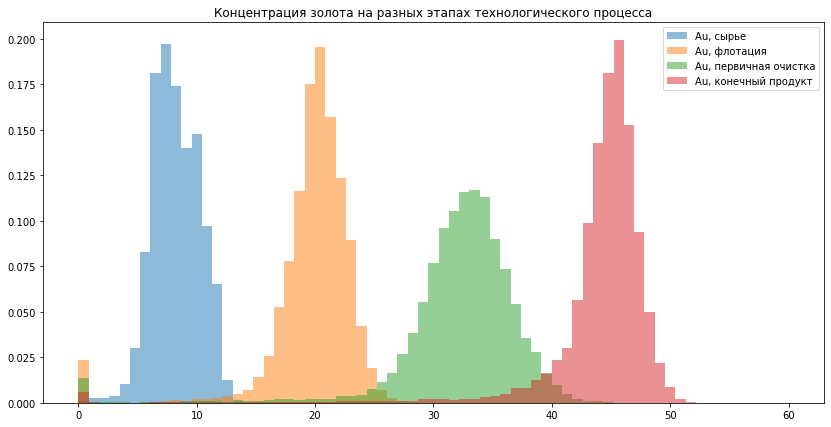

In [28]:
bins = np.linspace(0, 60, 70)

pyplot.figure(figsize=(14, 7))
pyplot.hist(df_full['rougher.input.feed_au'], bins, alpha=0.5, label='Au, сырье', density=True)
pyplot.hist(df_full['rougher.output.concentrate_au'], bins, alpha=0.5, label='Au, флотация', density=True)
pyplot.hist(df_full['primary_cleaner.output.concentrate_au'], bins, alpha=0.5, label='Au, первичная очистка', density=True)
pyplot.hist(df_full['final.output.concentrate_au'], bins, alpha=0.5, label='Au, конечный продукт', density=True)
pyplot.legend(loc='upper right')
pyplot.title('Концентрация золота на разных этапах технологического процесса')
pyplot.show()

**Вывод.** Ожидаемо, в процессе обогащения концентрация золота возрастает, в общей сложности более, чем в 5 раз (от сырья к конечному продукту). В трёх распределениях из четырех большинство из наиболее частых значений близки к среднему, распределение соответствующее флотации, ближе к нормальному. Обратим внимание на часто встречающиеся, нехарактерные значения равные нулю или близкие к нулю на всех этапах. Используем этот факт при дальнейшей обработке данных.

### Концентрация серебра

In [29]:
print('Среднее содержание Ag в сырье:', df_full['rougher.input.feed_ag'].mean())
print('Среднее содержание Ag на этапе флотации:', 
      df_full['rougher.output.concentrate_ag'].mean())
df_full['rougher.output.concentrate_ag'].value_counts()

Среднее содержание Ag в сырье: 8.794927425814688
Среднее содержание Ag на этапе флотации: 11.994759359873429


0.000000     394
7.458753      11
9.252737       6
9.975555       6
0.010000       5
            ... 
12.603623      1
7.610059       1
13.353075      1
12.803057      1
10.304030      1
Name: rougher.output.concentrate_ag, Length: 19015, dtype: int64

In [30]:
print('Среднее содержание Ag после этапа первичной очистки:', 
      df_full['primary_cleaner.output.concentrate_ag'].mean())
df_full['primary_cleaner.output.concentrate_ag'].value_counts()

Среднее содержание Ag после этапа первичной очистки: 8.44240807771906


0.010000    117
0.000000    108
8.339732      6
7.925334      5
9.987871      5
           ... 
8.361700      1
7.620419      1
6.205785      1
8.954860      1
9.844056      1
Name: primary_cleaner.output.concentrate_ag, Length: 19199, dtype: int64

In [31]:
print('Среднее содержание Ag в конечном продукте:', 
      df_full['final.output.concentrate_ag'].mean())
df_full['final.output.concentrate_ag'].value_counts()

Среднее содержание Ag в конечном продукте: 5.168386967510243


0.000000    98
5.925380    11
3.554558     7
3.572025     6
5.955403     5
            ..
6.703167     1
4.707040     1
4.932490     1
4.112471     1
4.334761     1
Name: final.output.concentrate_ag, Length: 19307, dtype: int64

Рассмотрим концентрацию металла на гистограммах для каждого этапа очистки.

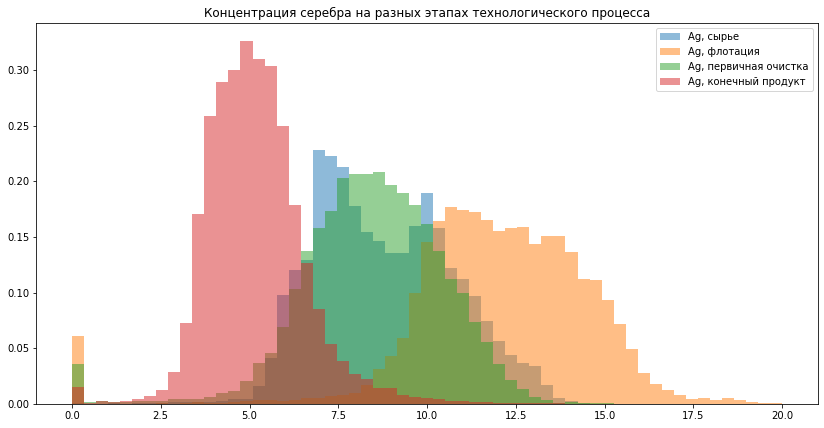

In [32]:
bins = np.linspace(0, 20, 60)

pyplot.figure(figsize=(14, 7))
pyplot.hist(df_full['rougher.input.feed_ag'], bins, alpha=0.5, label='Ag, сырье', density=True)
pyplot.hist(df_full['rougher.output.concentrate_ag'], bins, alpha=0.5, label='Ag, флотация', density=True)
pyplot.hist(df_full['primary_cleaner.output.concentrate_ag'], bins, alpha=0.5, label='Ag, первичная очистка', density=True)
pyplot.hist(df_full['final.output.concentrate_ag'], bins, alpha=0.5, label='Ag, конечный продукт', density=True)
pyplot.legend(loc='upper right')
pyplot.title('Концентрация серебра на разных этапах технологического процесса')
pyplot.show()

**Вывод.** В процессе обогащения концентрация серебра уменьшается, в общей сложности на 70% (от сырья к конечному продукту). После флотации концентрация серебра возрастает примерно в 1,5 раза, а после первичной очистки сокращается примерно до уровня показателей сырья. Далее после вторичной очистки (в конечном продукте) показатель снижается на 64%. Обратим внимание на часто встречающиеся, нехарактерные значения равные нулю или близкие к нулю на всех этапах. Используем этот факт при дальнейшей обработке данных.

### Концентрация свинца

In [33]:
print('Среднее содержание Pb в сырье:', df_full['rougher.input.feed_pb'].mean())
print('Среднее содержание Pb на этапе флотации:', 
      df_full['rougher.output.concentrate_pb'].mean())
df_full['rougher.output.concentrate_pb'].value_counts()

Среднее содержание Pb в сырье: 3.585095711585748
Среднее содержание Pb на этапе флотации: 7.606272313195003


0.000000     394
13.077148     11
8.452148       8
10.452148      7
9.764648       6
            ... 
7.095515       1
7.504966       1
6.577116       1
6.756150       1
8.700049       1
Name: rougher.output.concentrate_pb, Length: 18956, dtype: int64

In [34]:
print('Среднее содержание Pb после этапа первичной очистки:', 
      df_full['primary_cleaner.output.concentrate_pb'].mean())
df_full['primary_cleaner.output.concentrate_pb'].value_counts()

Среднее содержание Pb после этапа первичной очистки: 9.810316539310149


0.010000     118
0.000000     114
5.055124       7
10.952148      6
5.587420       6
            ... 
8.730603       1
12.906584      1
7.282277       1
10.741632      1
9.759185       1
Name: primary_cleaner.output.concentrate_pb, Length: 19055, dtype: int64

In [35]:
print('Среднее содержание Pb в конечном продукте:', 
      df_full['final.output.concentrate_pb'].mean())
df_full['final.output.concentrate_pb'].value_counts()

Среднее содержание Pb в конечном продукте: 9.978821384192907


0.000000     98
14.764648    11
11.452148     8
12.202148     7
12.577148     6
             ..
10.363694     1
9.172506      1
10.754769     1
11.650345     1
9.521703      1
Name: final.output.concentrate_pb, Length: 19276, dtype: int64

Рассмотрим концентрацию металла на гистограммах для каждого этапа очистки.

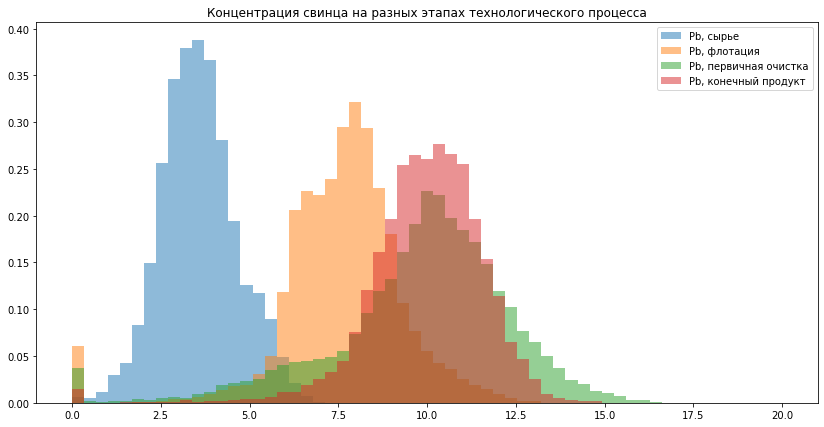

In [36]:
bins = np.linspace(0, 20, 60)


pyplot.figure(figsize=(14, 7))
pyplot.hist(df_full['rougher.input.feed_pb'], bins, alpha=0.5, label='Pb, сырье', density=True)
pyplot.hist(df_full['rougher.output.concentrate_pb'], bins, alpha=0.5, label='Pb, флотация', density=True)
pyplot.hist(df_full['primary_cleaner.output.concentrate_pb'], bins, alpha=0.5, label='Pb, первичная очистка', density=True)
pyplot.hist(df_full['final.output.concentrate_pb'], bins, alpha=0.5, label='Pb, конечный продукт', density=True)
pyplot.legend(loc='upper right')
pyplot.title('Концентрация свинца на разных этапах технологического процесса')
pyplot.show()

**Вывод.** В процессе обогащения концентрация свинца увеличивается, в общей сложности более, чем в 2,7 раза (от сырья к конечному продукту). Основное увеличение концентрации происходит после флотации и первичной очистки, а после вторичной очистки концентрация меняется мало (среднее значение увеличивается всего на 1,7%). Обратим внимание на часто встречающиеся, нехарактерные значения равные нулю или близкие к нулю на всех этапах. Используем этот факт при дальнейшей обработке данных.

### Сравнение размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной. Для анализа построим гистограммы распределения и вычислим средние значения:

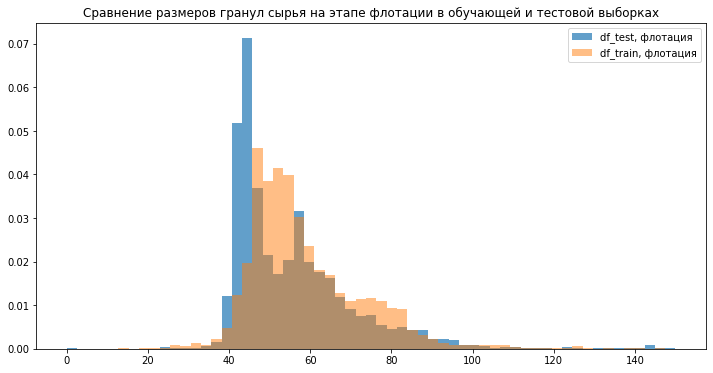

In [37]:
bins = np.linspace(0, 150, 60)

pyplot.figure(figsize=(12, 6))
pyplot.hist(df_test['rougher.input.feed_size'], bins, alpha=0.7, label='df_test, флотация', density=True)
pyplot.hist(df_train['rougher.input.feed_size'], bins, alpha=0.5, label='df_train, флотация', density=True)
pyplot.legend(loc='upper right')
pyplot.title('Сравнение размеров гранул сырья на этапе флотации в обучающей и тестовой выборках')
pyplot.show()

In [38]:
print('Соотношение среднего размера гранул сырья на этапе флотации:', 
      df_train['rougher.input.feed_size'].mean() / df_test['rougher.input.feed_size'].mean())

Соотношение среднего размера гранул сырья на этапе флотации: 1.0766200348502637


**Вывод.** Распределения друг от друга отличаются мало, средние значения - отличаются незначительно (на 7,66%) - модель будет работать корректно.

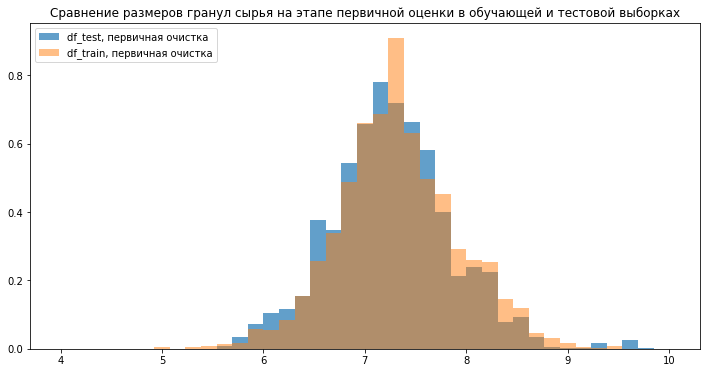

In [39]:
bins = np.linspace(4, 10, 40)

pyplot.figure(figsize=(12, 6))
pyplot.hist(df_test['primary_cleaner.input.feed_size'], bins, alpha=0.7, density=True,
            label='df_test, первичная очистка')
pyplot.hist(df_train['primary_cleaner.input.feed_size'], bins, alpha=0.5, density=True,
            label='df_train, первичная очистка')
pyplot.legend(loc='upper left')
pyplot.title('Сравнение размеров гранул сырья на этапе первичной оценки в обучающей и тестовой выборках')
pyplot.show()

In [40]:
print('Соотношение среднего размера гранул сырья на этапе первичной очистки:', 
      df_train['primary_cleaner.input.feed_size'].mean() / df_test['primary_cleaner.input.feed_size'].mean())

Соотношение среднего размера гранул сырья на этапе первичной очистки: 1.007702739186418


**Вывод.** Распределения друг от друга отличаются мало, средние значения - почти не отличаются (на 0,77%) - модель будет работать корректно.

### Анализ суммарной концентрации веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье (rougher.input.feed), после флотации (rougher.output), после первичной очистки (primary_cleaner.output) и в финальном концентрате (final.output). 

Обратим внимание на строки (выявленные ранее) со значениями равными нулю и близкими к нулю. Предположительно, подобные аномальные данные образовались в результате сбоя измерительной аппаратуры. Такие строки, записанные во время сбоев аппаратуры, лучше полностью удалить - в них может содержаться недостоверная информация во всех столбцах.

Оставим в датафрейме df_full_not0 только те строки полного датафрейма, где суммарная концентрация веществ на каждом этапе значительно отличается от нуля. Четыре раза последовательно применим фильтр на каждом этапе:

In [41]:
df_full_not0 = df_full.loc[((df_full['rougher.input.feed_au'] + 
                         df_full['rougher.input.feed_ag'] + 
                         df_full['rougher.input.feed_pb'] + 
                         df_full['rougher.input.feed_sol'])>0.1)]

In [42]:
df_full_not0 = df_full_not0.loc[((df_full['rougher.output.concentrate_au'] + 
                         df_full['rougher.output.concentrate_ag'] + 
                         df_full['rougher.output.concentrate_pb'] + 
                         df_full['rougher.output.concentrate_sol'])>0.1)]

In [43]:
df_full_not0 = df_full_not0.loc[((df_full['primary_cleaner.output.concentrate_au'] + 
                         df_full['primary_cleaner.output.concentrate_ag'] + 
                         df_full['primary_cleaner.output.concentrate_pb'] + 
                         df_full['primary_cleaner.output.concentrate_sol'])>0.1)]

In [44]:
df_full_not0 = df_full_not0.loc[((df_full['final.output.concentrate_au'] + 
                         df_full['final.output.concentrate_ag'] + 
                         df_full['final.output.concentrate_pb'] + 
                         df_full['final.output.concentrate_sol'])>0.1)]

In [45]:
df_full_not0.shape # проверка: всего удалили 714 строк

(18725, 87)

In [50]:
df_full['sum']=df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_sol']

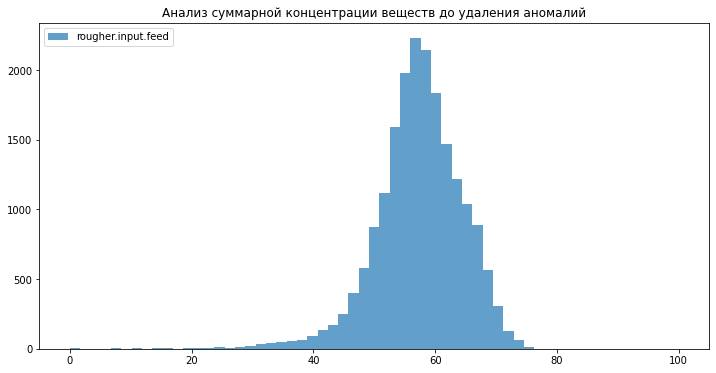

In [61]:
bins = np.linspace(0, 100, 60)

pyplot.figure(figsize=(12, 6))
pyplot.hist(df_full['sum'], bins, alpha=0.7, label='rougher.input.feed')
#pyplot.hist(df_train['primary_cleaner.input.feed_size'], bins, alpha=0.5, density=True,
#            label='df_train, первичная очистка')
pyplot.legend(loc='upper left')
pyplot.title('Анализ суммарной концентрации веществ до удаления аномалий')
pyplot.show()

In [63]:
df_full_not0['sum'] = df_full_not0['rougher.input.feed_au'] +\
                         df_full_not0['rougher.input.feed_ag'] +\
                         df_full_not0['rougher.input.feed_pb'] +\
                         df_full_not0['rougher.input.feed_sol']

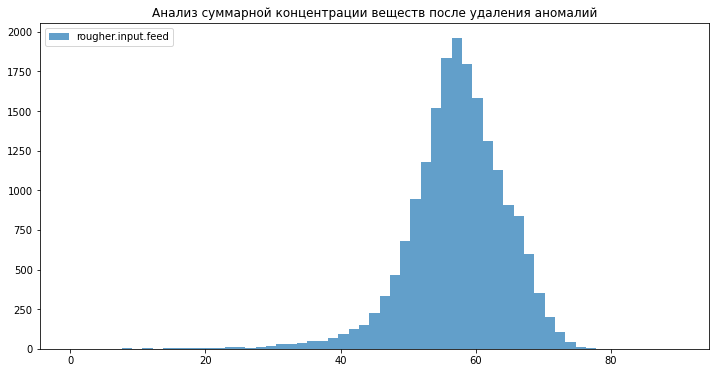

In [68]:
bins = np.linspace(0, 90, 60)

pyplot.figure(figsize=(12, 6))
pyplot.hist(df_full_not0['sum'], bins, alpha=0.7, label='rougher.input.feed')
#pyplot.hist(df_train['primary_cleaner.input.feed_size'], bins, alpha=0.5, density=True,
#            label='df_train, первичная очистка')
pyplot.legend(loc='upper left')
pyplot.title('Анализ суммарной концентрации веществ после удаления аномалий')
pyplot.show()

Создадим для дальнейшего использования и обучения моделей тестовый датафрейм data_test. Оставим в нём только те строки df_test, которые не содержат нулевых данных о суммарной концентрации, т.е. даты записи данных есть в столбце дат датафрейма df_full_not0. Сбросим индексы нового датафрейма: 

In [46]:
data_test = df_test.loc[df_test['date'].isin(df_full_not0['date'])].reset_index(drop=True)

In [47]:
data_test.shape # проверка: удалили 167 строк

(5123, 55)

Аналогично преобразуем data_train: оставим в нём только те строки, которые не содержат нулевых данных о суммарной концентрации, т.е. даты записи данных есть в столбце дат датафрейма df_full_not0.

In [48]:
data_train = data_train.loc[data_train['date'].isin(df_full_not0['date'])]

In [49]:
data_train.shape # проверка: удалили 547 строк

(13602, 55)

**Вывод по разделу №2.** Обучающая и тестовая выборки полностью готовы к созданию и обучению моделей.

## Создание моделей

В целях выполнения проекта проведем эксперименты с тремя моделями:
- модель линейной регрессии,
- модель случайного леса и 
- модель CatBoostRegressor.

### Подготовка признаков

Подготовим последовательно для обучающей и тестовой выборки обучающие признаки (features_train и features_test) и целевые признаки, по 2 для каждого этапа очистки: 
- target_train_rougher и target_test_rougher - для этапа флотации; 
- target_train_final и target_test_final - для окончательной очистки.

In [50]:
features_train = data_train.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

In [51]:
features_test = data_test.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

Отмасштабируем признаки с помощью StandardScaler():

In [52]:
scaler = StandardScaler()

scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

### Функции для расчетов

Метриками качества для наших моделей будут служить метрики sMAPE для этапов флотации (smape_rougher) и конечной очистки (smape_final), а также итоговое sMAPE, рассчитываемое по формуле:

Итоговое sMAPE = 25% х smape_rougher + 75% х smape_final

Именно по значению итогового sMAPE (total_smape) мы будем оценивать качество моделей.

Создадим две функции для расчета метрик:
- функцию sMAPE - для расчета smape_rougher и smape_final,
- функцию total_sMAPE - для расчета total_smape
    

In [53]:
def sMAPE(target, predictions):
    n = len(target)
    res = 100/n * np.sum(np.abs(target - predictions)/((np.abs(target) + np.abs(predictions))/2))
    return res
 
def total_sMAPE(smape_rougher, smape_final):
    return 0.25*smape_rougher + 0.75*smape_final

Создадим "скорер" - метод расчета метрики качества, который будет использоваться в процессе кросс-валидации вместо скорера по умолчанию:

In [54]:
scorer =  make_scorer(sMAPE)

### Модель линейной регрессии

In [55]:
model_lr = LinearRegression() # инициализируем модель LinearRegression

Дважды запустим процесс кросс-валидации (КВ), передав в него нашу модель и скорер и указав количество частей для разбиения признаков cv=5. В первом случае передадим в процесс КВ целевой признак флотации target_train_rougher, во втором случае - целевой признак конечной очистки target_train_final.

In [56]:
scores_train_rougher_lr = cross_val_score(model_lr, features_train, target_train_rougher, cv = 5, scoring=scorer)

Итогом работы процесса КВ будет набор из пяти оценок, найдя среднюю из них, мы получим метрику sMAPE для каждого из двух этапов очистки:

In [57]:
smape_rougher_lr = scores_train_rougher_lr.mean() # sMAPE для этапа флотации

In [58]:
scores_train_final_lr = cross_val_score(model_lr, features_train, target_train_final, cv = 5, scoring=scorer)

In [59]:
smape_final_lr = scores_train_final_lr.mean() # sMAPE для этапа конечной очистки

Вызовем функцию total_sMAPE для расчета итогового sMAPE для модели:

In [60]:
total_smape_lr = total_sMAPE(smape_rougher_lr, smape_final_lr)

In [61]:
print('Значение метрики total_sMAPE для модели линейной регрессии:', total_smape_lr)

Значение метрики total_sMAPE для модели линейной регрессии: 10.079140755126794


**Вывод.** Невысокое качество модели линейной регрессии с метрикой более 10% требует объективной проверки. Для этого подойдёт константная модель.

### Константная модель

Создадим константную модель DummyRegressor(), по умолчанию в ней strategy='mean', т.е. всегда предсказывается среднее значение. Проведём эксперимент с константной моделью по указанной выше процедуре и получим значение метрики total_smape:

In [62]:
model_dr = DummyRegressor()

In [63]:
model_dr

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [64]:
scores_train_rougher_dr = cross_val_score(model_dr, features_train, target_train_rougher, cv = 5, scoring=scorer)

In [65]:
scores_train_final_dr = cross_val_score(model_dr, features_train, target_train_final, cv = 5, scoring=scorer)

In [66]:
smape_rougher_dr = scores_train_rougher_dr.mean() # sMAPE для этапа флотации

In [67]:
smape_final_dr = scores_train_final_dr.mean() # sMAPE для этапа конечной очистки

In [68]:
total_smape_dr = total_sMAPE(smape_rougher_dr, smape_final_dr)

In [69]:
print('Значение метрики total_sMAPE для константной модели:', total_smape_dr)

Значение метрики total_sMAPE для константной модели: 9.643945176879651


**Вывод.** Константная модель показала качество лучше, чем линейная регрессия с параметрами по умолчанию. Линейная регрессия для нашей задачи работает неудовлетворительно.
Будем использовать значение метрики total_sMAPE для константной модели 9.64 при оценке других моделей.

### Модель случайного леса

Создадим модель случайного леса RandomForestRegressor() с параметрами, найденными экспериментальным путём, при которых модель работает лучше, чем с параметрами по умолчанию:
- n_estimators=50 - количество деревьев,
- max_depth=5 - максимальная глубина дерева.

Проведём эксперимент с данной моделью по указанной выше процедуре и получим значение метрики total_smape:

In [70]:
model_rf = RandomForestRegressor(random_state=12345, n_estimators=50, max_depth=5)# инициализируем модель RandomForestRegressor

In [71]:
scores_train_rougher_rf = cross_val_score(model_rf, features_train, target_train_rougher, cv = 5, scoring=scorer)

In [72]:
smape_rougher_rf = scores_train_rougher_rf.mean() # sMAPE для этапа флотации

In [73]:
scores_train_final_rf = cross_val_score(model_rf, features_train, target_train_final, cv = 5, scoring=scorer)

In [74]:
smape_final_rf = scores_train_final_rf.mean() # sMAPE для этапа конечной очистки

In [75]:
total_smape_rf = total_sMAPE(smape_rougher_rf, smape_final_rf)

In [76]:
print('Значение метрики total_sMAPE для модели случайного леса:', total_smape_rf)

Значение метрики total_sMAPE для модели случайного леса: 8.22880379181631


**Вывод.** Модель случайного леса показала значение метрики на 17% лучше, чем константная модель.

### Модель CatBoostRegressor

Создадим модель CatBoostRegressor() с параметрами, найденными экспериментальным путём, при которых модель работает лучше, чем с параметрами по умолчанию:
- iterations=500 - количество итераций,
- learning_rate=0.008 - скорость обучения,
- depth=3 - глубина дерева.

Проведём эксперимент с данной моделью по указанной выше процедуре и получим значение метрики total_smape:

In [77]:
model_cb = CatBoostRegressor(iterations=500, learning_rate=0.008, depth=3) # инициализируем модель CatBoostRegressor

In [78]:
scores_train_rougher_cb = cross_val_score(model_cb, features_train, target_train_rougher, cv = 5, scoring=scorer)

0:	learn: 7.2311002	total: 56.1ms	remaining: 28s
1:	learn: 7.2071070	total: 63.3ms	remaining: 15.8s
2:	learn: 7.1834852	total: 124ms	remaining: 20.5s
3:	learn: 7.1598553	total: 130ms	remaining: 16.2s
4:	learn: 7.1359775	total: 221ms	remaining: 21.8s
5:	learn: 7.1130323	total: 228ms	remaining: 18.7s
6:	learn: 7.0925494	total: 233ms	remaining: 16.4s
7:	learn: 7.0712211	total: 323ms	remaining: 19.9s
8:	learn: 7.0485427	total: 331ms	remaining: 18s
9:	learn: 7.0282104	total: 337ms	remaining: 16.5s
10:	learn: 7.0088222	total: 426ms	remaining: 18.9s
11:	learn: 6.9866915	total: 433ms	remaining: 17.6s
12:	learn: 6.9674943	total: 514ms	remaining: 19.3s
13:	learn: 6.9460926	total: 523ms	remaining: 18.1s
14:	learn: 6.9259101	total: 529ms	remaining: 17.1s
15:	learn: 6.9050530	total: 534ms	remaining: 16.2s
16:	learn: 6.8859650	total: 616ms	remaining: 17.5s
17:	learn: 6.8677065	total: 623ms	remaining: 16.7s
18:	learn: 6.8473898	total: 631ms	remaining: 16s
19:	learn: 6.8294185	total: 715ms	remaining: 

In [79]:
smape_rougher_cb = scores_train_rougher_cb.mean() # sMAPE для этапа флотации

In [80]:
scores_train_final_cb = cross_val_score(model_cb, features_train, target_train_final, cv = 5, scoring=scorer)

0:	learn: 9.0448665	total: 6.83ms	remaining: 3.41s
1:	learn: 9.0272774	total: 13.3ms	remaining: 3.31s
2:	learn: 9.0103553	total: 62.5ms	remaining: 10.4s
3:	learn: 8.9934149	total: 69.8ms	remaining: 8.66s
4:	learn: 8.9759849	total: 75.7ms	remaining: 7.49s
5:	learn: 8.9597203	total: 164ms	remaining: 13.5s
6:	learn: 8.9430010	total: 170ms	remaining: 12s
7:	learn: 8.9267272	total: 177ms	remaining: 10.9s
8:	learn: 8.9103542	total: 266ms	remaining: 14.5s
9:	learn: 8.8934367	total: 273ms	remaining: 13.4s
10:	learn: 8.8773324	total: 362ms	remaining: 16.1s
11:	learn: 8.8616935	total: 369ms	remaining: 15s
12:	learn: 8.8462957	total: 456ms	remaining: 17.1s
13:	learn: 8.8306321	total: 466ms	remaining: 16.2s
14:	learn: 8.8153999	total: 474ms	remaining: 15.3s
15:	learn: 8.8002373	total: 560ms	remaining: 16.9s
16:	learn: 8.7857414	total: 567ms	remaining: 16.1s
17:	learn: 8.7714540	total: 575ms	remaining: 15.4s
18:	learn: 8.7562762	total: 660ms	remaining: 16.7s
19:	learn: 8.7417923	total: 667ms	remain

In [81]:
smape_final_cb = scores_train_final_cb.mean() # sMAPE для этапа конечной очистки

In [82]:
total_smape_cb = total_sMAPE(smape_rougher_cb, smape_final_cb)

In [83]:
print('Значение метрики total_sMAPE для модели CatBoostRegressor:', total_smape_cb)

Значение метрики total_sMAPE для модели CatBoostRegressor: 8.123153946157371


**Вывод.** Использование модели CatBoostRegressor позволило ещё улучшить значение итоговой метрики качества на 1,3%. Данная модель показала наилучший итоговый результат и будет проверена на тестовой выборке для рекомендации заказчику.

### Проверка на тестовой выборке

Обучим модель CatBoostRegressor на обучающей выборке и сделаем предсказания на тестовой выборке дважды - для двух этапов очистки, после чего рассчитаем метрику качества:

In [84]:
model_cb.fit(features_train, target_train_rougher) # обучение и предсказания для этапа флотации
prediction_test_rougher = model_cb.predict(features_test)

0:	learn: 7.8880186	total: 8.69ms	remaining: 4.33s
1:	learn: 7.8643885	total: 16.7ms	remaining: 4.16s
2:	learn: 7.8404961	total: 23.9ms	remaining: 3.96s
3:	learn: 7.8174209	total: 115ms	remaining: 14.3s
4:	learn: 7.7945283	total: 122ms	remaining: 12s
5:	learn: 7.7721442	total: 215ms	remaining: 17.7s
6:	learn: 7.7500195	total: 222ms	remaining: 15.6s
7:	learn: 7.7287763	total: 312ms	remaining: 19.2s
8:	learn: 7.7073323	total: 319ms	remaining: 17.4s
9:	learn: 7.6859528	total: 412ms	remaining: 20.2s
10:	learn: 7.6649827	total: 419ms	remaining: 18.6s
11:	learn: 7.6450329	total: 508ms	remaining: 20.7s
12:	learn: 7.6247941	total: 516ms	remaining: 19.3s
13:	learn: 7.6039440	total: 606ms	remaining: 21s
14:	learn: 7.5843359	total: 612ms	remaining: 19.8s
15:	learn: 7.5639039	total: 618ms	remaining: 18.7s
16:	learn: 7.5440764	total: 709ms	remaining: 20.1s
17:	learn: 7.5240304	total: 716ms	remaining: 19.2s
18:	learn: 7.5039078	total: 810ms	remaining: 20.5s
19:	learn: 7.4849190	total: 816ms	remainin

In [85]:
model_cb.fit(features_train, target_train_final) # обучение и предсказания для этапа конечной очистки
prediction_test_final = model_cb.predict(features_test)

0:	learn: 9.1293537	total: 6.73ms	remaining: 3.36s
1:	learn: 9.1135369	total: 13.2ms	remaining: 3.28s
2:	learn: 9.0958535	total: 54.2ms	remaining: 8.98s
3:	learn: 9.0786903	total: 60.6ms	remaining: 7.51s
4:	learn: 9.0618243	total: 151ms	remaining: 14.9s
5:	learn: 9.0452473	total: 157ms	remaining: 12.9s
6:	learn: 9.0288069	total: 162ms	remaining: 11.4s
7:	learn: 9.0130926	total: 249ms	remaining: 15.3s
8:	learn: 8.9975108	total: 263ms	remaining: 14.4s
9:	learn: 8.9812649	total: 346ms	remaining: 17s
10:	learn: 8.9660728	total: 351ms	remaining: 15.6s
11:	learn: 8.9511434	total: 357ms	remaining: 14.5s
12:	learn: 8.9359425	total: 445ms	remaining: 16.7s
13:	learn: 8.9215177	total: 451ms	remaining: 15.7s
14:	learn: 8.9077068	total: 457ms	remaining: 14.8s
15:	learn: 8.8926928	total: 549ms	remaining: 16.6s
16:	learn: 8.8787388	total: 554ms	remaining: 15.8s
17:	learn: 8.8649775	total: 642ms	remaining: 17.2s
18:	learn: 8.8511592	total: 647ms	remaining: 16.4s
19:	learn: 8.8365674	total: 653ms	remai

In [86]:
smape_test_rougher = sMAPE(target_test_rougher, prediction_test_rougher)
smape_test_final = sMAPE(target_test_final, prediction_test_final)
total_smape_test = total_sMAPE(smape_test_rougher, smape_test_final)

In [87]:
print('Значение метрики total_sMAPE для модели CatBoostRegressor на тестовой выборке:', total_smape_test)

Значение метрики total_sMAPE для модели CatBoostRegressor на тестовой выборке: 6.452619493531651


## Общий вывод

В ходе реализации проекта были проведены эксперименты с несколькими моделями машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды.

В результате наилучшая метрика качества была достигнута при применении модели CatBoostRegressor - на тестовой выборке получено значение метрики "итоговое sMAPE", равное 6,45%. Этот результат позволяет дать рекомендацию заказчику для использования данной модели в производственном процессе.